In [1]:
import bilby
import numpy as np
import matplotlib.pylab as plt
import json
import os
from os import path
import pandas as pd
import plotsettings

# Loading and Saving the evidences .. dont run  unless neccesary

In [51]:
# read single injection
loc_data='.'
inj_model='T'
hyp_model='S'
inj_id=2
filename1=loc_data+'/'+'3det/'+str(inj_id)+'/'+inj_model+'/'+hyp_model+'_result.json'
filename2=loc_data+'/'+'5det/'+str(inj_id)+'/'+inj_model+'/'+hyp_model+'_result.json'

if (path.isfile(filename1) == 1) & (path.isfile(filename2) == 1):
    results_1=bilby.result.read_in_result(outdir=loc_data+'/'+'3det/'+str(inj_id)+'/'+inj_model+'/', label=hyp_model)
    ln_Z1 = results_1.log_evidence 
    results_2=bilby.result.read_in_result(outdir=loc_data+'/'+'5det/'+str(inj_id)+'/'+inj_model+'/', label=hyp_model)
    ln_Z2 = results_2.log_evidence 

In [2]:
# all injections
n=200
cols=['inj_id','3_T','5_T','3_V','5_V','3_S','5_S']
log_evidences_df=pd.DataFrame(columns=cols, index=range(n))


In [3]:
loc_data='.'
inj_model='T'
for inj_id in range(n):
    log_evidences_df['inj_id'][inj_id] = inj_id
    for hyp_model in ['T', 'V','S']:
        filename1=loc_data+'/'+'3det/'+str(inj_id)+'/'+inj_model+'/'+hyp_model+'_result.json'
        filename2=loc_data+'/'+'5det/'+str(inj_id)+'/'+inj_model+'/'+hyp_model+'_result.json'
        if (path.isfile(filename1) == 1) & (path.isfile(filename2) == 1):
            results_1=bilby.result.read_in_result(outdir=loc_data+'/'+'3det/'+str(inj_id)+'/'+inj_model+'/', label=hyp_model)
            ln_Z1 = results_1.log_evidence 
            results_2=bilby.result.read_in_result(outdir=loc_data+'/'+'5det/'+str(inj_id)+'/'+inj_model+'/', label=hyp_model)
            ln_Z2 = results_2.log_evidence
            log_evidences_df['3_'+hyp_model][inj_id] = ln_Z1
            log_evidences_df['5_'+hyp_model][inj_id] = ln_Z2
    print(inj_id)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [5]:
log_evidences_df

inj_id      3_T      5_T      3_V      5_V      3_S      5_S
0        0 -35.3152 -38.7156 -37.2668 -70.8861 -38.2187 -129.744
1        1  -33.634 -40.3894 -38.0542 -75.4829 -34.3146 -112.689
2        2 -36.9727  -39.725 -42.2906 -134.894 -42.1318 -152.133
3        3 -27.0578 -27.9586 -30.1554 -39.5259 -32.0507 -53.8727
4        4 -26.0214 -31.2021 -38.0394 -66.1431 -38.7355   -87.53
..     ...      ...      ...      ...      ...      ...      ...
195    195 -33.0164 -34.9169  -34.288 -72.0749 -33.5733 -73.8641
196    196 -34.9376   -38.83 -37.7771 -57.8259 -36.3271 -54.7572
197    197 -32.2449 -37.9946 -52.9918 -101.175 -51.1388 -99.8084
198    198 -33.4776 -35.6756 -45.9584 -140.928 -71.2092 -169.952
199    199 -32.8772 -35.1136 -41.9485 -163.491 -42.4071 -211.362

[200 rows x 7 columns]

In [59]:
log_evidences_df.to_csv('log_evidences_results_Tinj')

# Load and analyse the evidences

In [35]:
log_evidences_df=pd.read_csv('log_evidences_results_Tinj')

In [36]:
log_evidences_df=log_evidences_df.drop(columns='Unnamed: 0')
log_evidences_df

inj_id        3_T        5_T        3_V         5_V        3_S  \
0         0 -35.315157 -38.715629 -37.266819  -70.886116 -38.218671   
1         1 -33.633967 -40.389355 -38.054157  -75.482881 -34.314635   
2         2 -36.972680 -39.724955 -42.290584 -134.894389 -42.131776   
3         3 -27.057751 -27.958641 -30.155378  -39.525945 -32.050678   
4         4 -26.021406 -31.202104 -38.039389  -66.143131 -38.735539   
..      ...        ...        ...        ...         ...        ...   
195     195 -33.016410 -34.916912 -34.288024  -72.074856 -33.573280   
196     196 -34.937619 -38.830018 -37.777129  -57.825931 -36.327131   
197     197 -32.244907 -37.994553 -52.991840 -101.174956 -51.138799   
198     198 -33.477616 -35.675648 -45.958416 -140.928399 -71.209189   
199     199 -32.877205 -35.113622 -41.948529 -163.490997 -42.407064   

            5_S        4_T        4_V        4_S  
0   -129.744031 -35.055180 -47.003346 -51.885537  
1   -112.689297 -34.013814 -46.911076 -47.851411  
2   -152.132921 -37.827299 -49.839670 -49.587225  
3    -53.872673 -27.281741 -33.742982 -39.943463  
4    -87.530035 -26.699246 -45.964593 -47.657187  
..          ...        ...        ...        ...  
195  -73.864113 -32.410681 -38.345652 -36.449805  
196  -54.757233 -36.253076 -41.957949 -43.880505  
197  -99.808372 -33.468370 -60.451228 -63.400091  
198 -169.952391 -34.866124 -74.965107 -87.404457  
199 -211.362227 -33.167414 -63.377361 -66.564985  

[200 rows x 10 columns]

In [37]:
log_evidences_df['HL_T']=''
log_evidences_df['HL_V']=''
log_evidences_df['HL_S']=''
log_evidences_df['HLA_T']=''
log_evidences_df['HLA_V']=''
log_evidences_df['HLA_S']=''
log_evidences_df

inj_id        3_T        5_T        3_V         5_V        3_S  \
0         0 -35.315157 -38.715629 -37.266819  -70.886116 -38.218671   
1         1 -33.633967 -40.389355 -38.054157  -75.482881 -34.314635   
2         2 -36.972680 -39.724955 -42.290584 -134.894389 -42.131776   
3         3 -27.057751 -27.958641 -30.155378  -39.525945 -32.050678   
4         4 -26.021406 -31.202104 -38.039389  -66.143131 -38.735539   
..      ...        ...        ...        ...         ...        ...   
195     195 -33.016410 -34.916912 -34.288024  -72.074856 -33.573280   
196     196 -34.937619 -38.830018 -37.777129  -57.825931 -36.327131   
197     197 -32.244907 -37.994553 -52.991840 -101.174956 -51.138799   
198     198 -33.477616 -35.675648 -45.958416 -140.928399 -71.209189   
199     199 -32.877205 -35.113622 -41.948529 -163.490997 -42.407064   

            5_S        4_T        4_V        4_S HL_T HL_V HL_S HLA_T HLA_V  \
0   -129.744031 -35.055180 -47.003346 -51.885537                              
1   -112.689297 -34.013814 -46.911076 -47.851411                              
2   -152.132921 -37.827299 -49.839670 -49.587225                              
3    -53.872673 -27.281741 -33.742982 -39.943463                              
4    -87.530035 -26.699246 -45.964593 -47.657187                              
..          ...        ...        ...        ...  ...  ...  ...   ...   ...   
195  -73.864113 -32.410681 -38.345652 -36.449805                              
196  -54.757233 -36.253076 -41.957949 -43.880505                              
197  -99.808372 -33.468370 -60.451228 -63.400091                              
198 -169.952391 -34.866124 -74.965107 -87.404457                              
199 -211.362227 -33.167414 -63.377361 -66.564985                              

    HLA_S  
0          
1          
2          
3          
4          
..    ...  
195        
196        
197        
198        
199        

[200 rows x 16 columns]

In [38]:
n=200
loc_data='.'
inj_model='T'
for inj_id in range(n):
    log_evidences_df['inj_id'][inj_id] = inj_id
    for hyp_model in ['T', 'V','S']:
        filename1=loc_data+'/'+'HL/'+str(inj_id)+'/'+inj_model+'/'+hyp_model+'_result.json'
        filename2=loc_data+'/'+'HLA/'+str(inj_id)+'/'+inj_model+'/'+hyp_model+'_result.json'
        if (path.isfile(filename1) == 1) & (path.isfile(filename2) == 1):
            results_1=bilby.result.read_in_result(outdir=loc_data+'/'+'HL/'+str(inj_id)+'/'+inj_model+'/', label=hyp_model)
            ln_Z1 = results_1.log_evidence 
            log_evidences_df['HL_'+hyp_model][inj_id] = ln_Z1
            results_2=bilby.result.read_in_result(outdir=loc_data+'/'+'HLA/'+str(inj_id)+'/'+inj_model+'/', label=hyp_model)
            ln_Z2 = results_2.log_evidence 
            log_evidences_df['HLA_'+hyp_model][inj_id] = ln_Z2
    print(inj_id)
    
columns=log_evidences_df.columns.values
for col in columns:
    log_evidences_df[col].replace('', np.nan, inplace=True)
    log_evidences_df= log_evidences_df.dropna(subset=[col])
    
log_evidences_df.to_csv('log_evidences_results_Tinj')
log_evidences_df

/home1/srashti.goyal/py36_srashti/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home1/srashti.goyal/py36_srashti/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home1/srashti.goyal/py36_srashti/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


inj_id        3_T        5_T        3_V         5_V        3_S  \
0         0 -35.315157 -38.715629 -37.266819  -70.886116 -38.218671   
1         1 -33.633967 -40.389355 -38.054157  -75.482881 -34.314635   
2         2 -36.972680 -39.724955 -42.290584 -134.894389 -42.131776   
3         3 -27.057751 -27.958641 -30.155378  -39.525945 -32.050678   
4         4 -26.021406 -31.202104 -38.039389  -66.143131 -38.735539   
..      ...        ...        ...        ...         ...        ...   
195     195 -33.016410 -34.916912 -34.288024  -72.074856 -33.573280   
196     196 -34.937619 -38.830018 -37.777129  -57.825931 -36.327131   
197     197 -32.244907 -37.994553 -52.991840 -101.174956 -51.138799   
198     198 -33.477616 -35.675648 -45.958416 -140.928399 -71.209189   
199     199 -32.877205 -35.113622 -41.948529 -163.490997 -42.407064   

            5_S        4_T        4_V        4_S       HL_T       HL_V  \
0   -129.744031 -35.055180 -47.003346 -51.885537 -31.872788 -32.572220   
1   -112.689297 -34.013814 -46.911076 -47.851411 -32.442817 -34.253719   
2   -152.132921 -37.827299 -49.839670 -49.587225 -34.567213 -35.850175   
3    -53.872673 -27.281741 -33.742982 -39.943463 -22.574306 -23.991727   
4    -87.530035 -26.699246 -45.964593 -47.657187 -20.014080 -20.061999   
..          ...        ...        ...        ...        ...        ...   
195  -73.864113 -32.410681 -38.345652 -36.449805 -29.646078 -31.978451   
196  -54.757233 -36.253076 -41.957949 -43.880505 -33.242548 -34.881099   
197  -99.808372 -33.468370 -60.451228 -63.400091 -24.507576 -24.405770   
198 -169.952391 -34.866124 -74.965107 -87.404457 -28.155007 -28.063150   
199 -211.362227 -33.167414 -63.377361 -66.564985 -29.443130 -32.067424   

          HL_S      HLA_T       HLA_V       HLA_S  
0   -35.285624 -38.198893 -102.757118 -126.665350  
1   -33.768744 -36.994419  -45.350098  -43.724740  
2   -36.590374 -39.788177  -56.888224 -134.811754  
3   -25.788817 -28.611949  -30.388574  -47.899751  
4   -21.325021 -30.375386  -43.735847  -48.653606  
..         ...        ...         ...         ...  
195 -30.845468 -35.787041  -48.509657  -74.084967  
196 -34.475620 -37.956435  -42.718987  -40.657368  
197 -26.814216 -33.692183  -48.772315  -55.844702  
198 -31.131450 -35.349723  -59.545086 -106.269740  
199 -31.359820 -35.018868  -98.078242 -197.588139  

[196 rows x 16 columns]

In [39]:
ln_BTV_3=log_evidences_df['3_T']-log_evidences_df['3_V']
ln_BTS_3=log_evidences_df['3_T']-log_evidences_df['3_S']
ln_BTV_4=log_evidences_df['4_T']-log_evidences_df['4_V']
ln_BTS_4=log_evidences_df['4_T']-log_evidences_df['4_S']
ln_BTV_5=log_evidences_df['5_T']-log_evidences_df['5_V']
ln_BTS_5=log_evidences_df['5_T']-log_evidences_df['5_S']


In [40]:
ln_BTV_HL=log_evidences_df['HL_T']-log_evidences_df['HL_V']
ln_BTS_HL=log_evidences_df['HL_T']-log_evidences_df['HL_S']
ln_BTV_HLA=log_evidences_df['HLA_T']-log_evidences_df['HLA_V']
ln_BTS_HLA=log_evidences_df['HLA_T']-log_evidences_df['HLA_S']

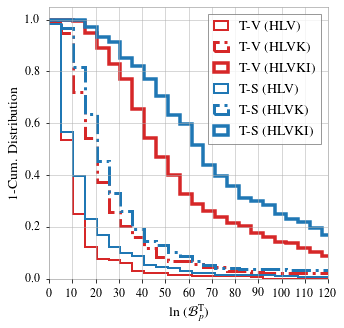

In [63]:
plt.figure(figsize=(5,5))
ln_B_bins=np.linspace(-5,250,51)
h1=plt.hist(ln_BTV_3, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=2, ls='-', color='tab:red', label='T-V (HLV)')
h3=plt.hist(ln_BTV_4, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3, ls='-.', color='tab:red', label='T-V (HLVK)')
h2=plt.hist(ln_BTV_5, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3.5, ls='-', color='tab:red', label='T-V (HLVKA)')
h1=plt.hist(ln_BTS_3, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=2, ls='-', color='tab:blue', label='T-S (HLV)')
h3=plt.hist(ln_BTS_4, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3, ls='-.', color='tab:blue', label='T-S (HLVK)')
h2=plt.hist(ln_BTS_5, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3.5, ls='-', color='tab:blue', label='T-S (HLVKA)')

plt.xlabel('ln ($\mathcal{B}^\mathrm{T}_p$)')
plt.ylabel('1-Cum. Distribution')
plt.xticks(np.arange(0,250,10))
plt.legend()
plt.xlim(0,120)
plt.savefig('3vs4vs5det_pol_test.pdf')
plt.show()


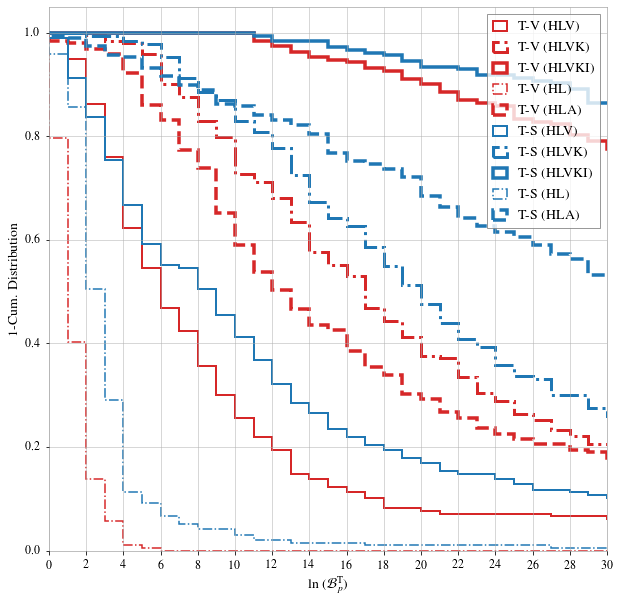

In [66]:
plt.figure(figsize=(10,10))
ln_B_bins=np.arange(-5,250,1)
h1=plt.hist(ln_BTV_3, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=2, ls='-', color='tab:red', label='T-V (HLV)')
h3=plt.hist(ln_BTV_4, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3, ls='-.', color='tab:red', label='T-V (HLVK)')
h2=plt.hist(ln_BTV_5, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3.5, ls='-', color='tab:red', label='T-V (HLVKI)')
h2=plt.hist(ln_BTV_HL, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=1.5, ls='-.', color='tab:red', label='T-V (HL)')
h2=plt.hist(ln_BTV_HLA, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3.5, ls='--', color='tab:red', label='T-V (HLA)')

h1=plt.hist(ln_BTS_3, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=2, ls='-', color='tab:blue', label='T-S (HLV)')
h3=plt.hist(ln_BTS_4, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3, ls='-.', color='tab:blue', label='T-S (HLVK)')
h2=plt.hist(ln_BTS_5, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3.5, ls='-', color='tab:blue', label='T-S (HLVKI)')
h2=plt.hist(ln_BTS_HL, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=1.5, ls='-.', color='tab:blue', label='T-S (HL)')
h2=plt.hist(ln_BTS_HLA, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3.5, ls='--', color='tab:blue', label='T-S (HLA)')

plt.xlabel('ln ($\mathcal{B}^\mathrm{T}_p$)')
plt.ylabel('1-Cum. Distribution')
plt.xticks(np.arange(0,250,2))
plt.legend()
plt.xlim(0,30)
plt.savefig('net_comp_pol_test.pdf')
plt.show()


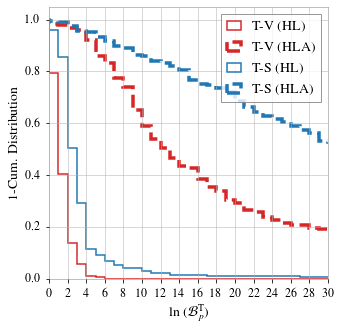

In [61]:
plt.figure(figsize=(5,5))
ln_B_bins=np.arange(-5,250,1)
h2=plt.hist(ln_BTV_HL, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=1.5, ls='-', color='tab:red', label='T-V (HL)')
h2=plt.hist(ln_BTV_HLA, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3.5, ls='--', color='tab:red', label='T-V (HLA)')


h2=plt.hist(ln_BTS_HL, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=1.5, ls='-', color='tab:blue', label='T-S (HL)')
h2=plt.hist(ln_BTS_HLA, ln_B_bins, cumulative=-1,histtype='step',density=True, lw=3.5, ls='--', color='tab:blue', label='T-S (HLA)')

plt.xlabel('ln ($\mathcal{B}^\mathrm{T}_p$)')
plt.ylabel('1-Cum. Distribution')
plt.xticks(np.arange(0,60,2))
plt.legend()
plt.xlim(0,30)
plt.savefig('HLvsHLA_pol_test.pdf')
plt.show()
